# Zpracování obrazu

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
FILE_NAME = os.path.join('data', 'images', '6', '241b9816-86c9-4c47-9864-20245e5b9ae8.jpg')
BACKGROUND_NAME = os.path.join('data', 'images', 'background.jpg')

## Načtení a zobrazení obrázku

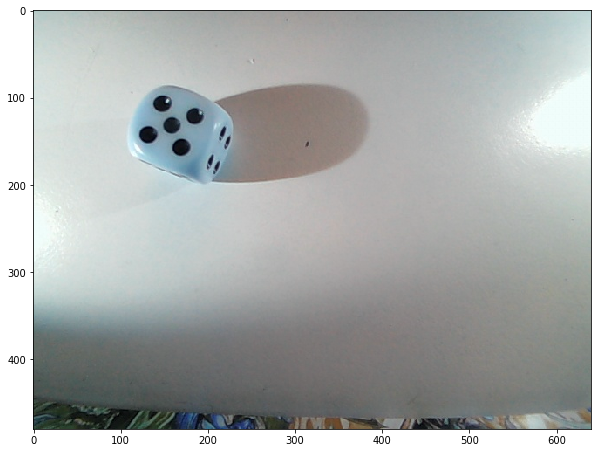

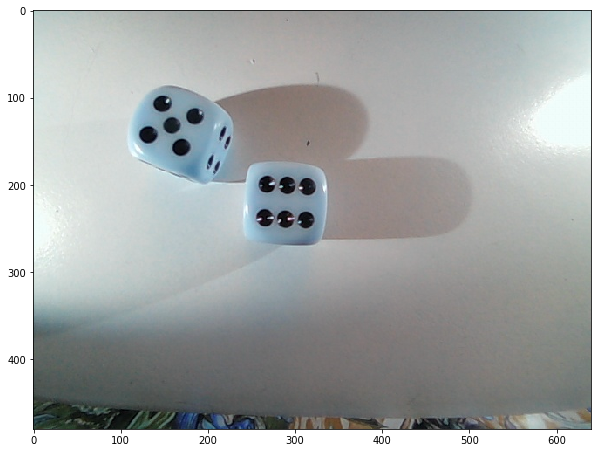

In [4]:
image = cv2.imread(FILE_NAME) 
image_background = cv2.imread(BACKGROUND_NAME)

plt.figure(figsize=(10,10))
plt.imshow(image_background)
plt.figure(figsize=(10,10))
plt.imshow(image)

## Převod do stupňů šedi

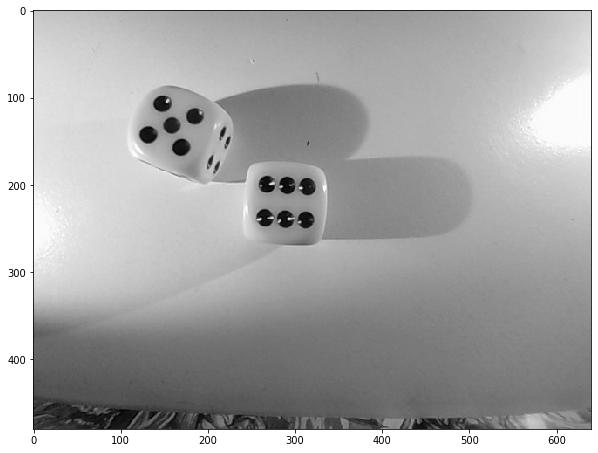

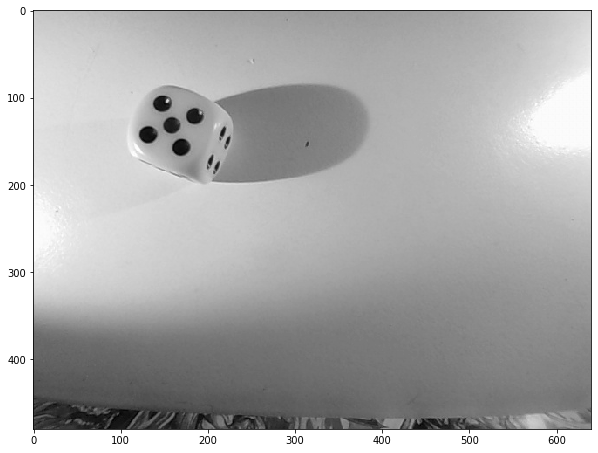

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
background_gray =cv2.cvtColor(image_background, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(background_gray, cmap='gray', vmin=0, vmax=255)

## Odečtení pozadí

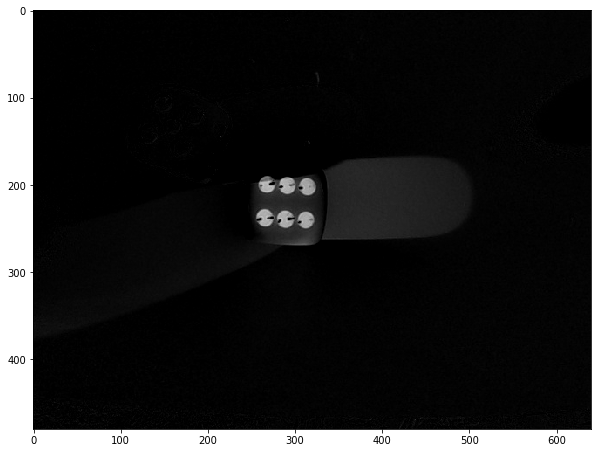

In [6]:
image_subtracted = cv2.subtract(background_gray, image_gray)
plt.figure(figsize=(10,10))
plt.imshow(image_subtracted, cmap='gray', vmin=0, vmax=255)

## Oprahování

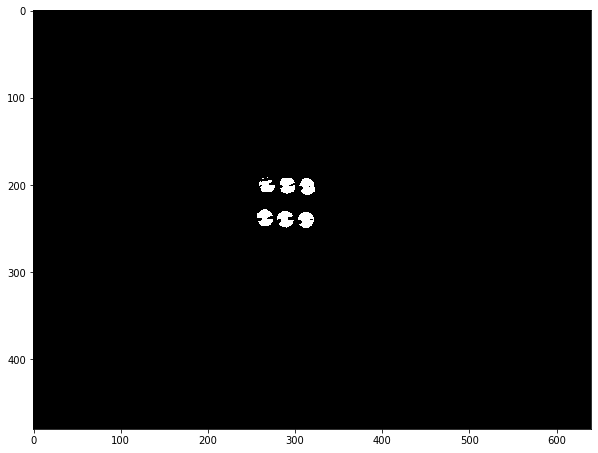

In [7]:
ret, image_threshold = cv2.threshold(image_subtracted, 120, 255, cv2.THRESH_BINARY)  # image threshold
plt.figure(figsize=(10,10))
plt.imshow(image_threshold, cmap='gray', vmin=0, vmax=255)

## Nalezení kontur a vykreslení výsledku

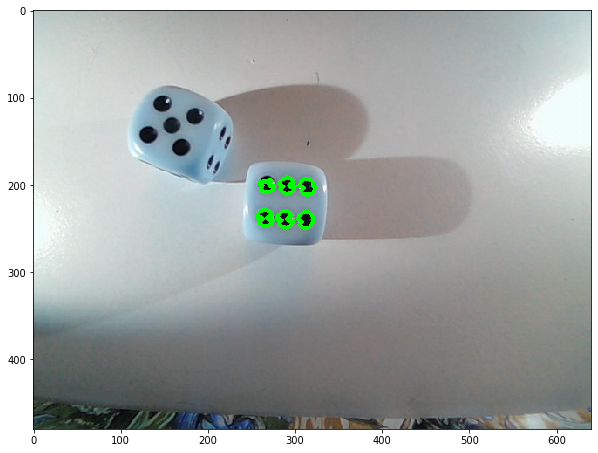

In [8]:
contours, hierarchy = cv2.findContours(image_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
target_contours = []
for contour in contours:
    contour_area = cv2.contourArea(contour)  # estimate contour area
    if contour_area > 100:
            target_contours.append(contour)
cv2.drawContours(image, target_contours, -1, (0, 255, 0), 3)  # draw contour into color image
plt.figure(figsize=(10,10))
plt.imshow(image)

In [9]:
print(len(target_contours))

6
